In [1]:
'''import os
os.chdir(r'C:\Users\preet\Desktop\home.llc')'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#monthwise us population
population = pd.read_csv('data/population.csv')
population.head()

,DATE,POPTHM
0,01-01-1998,274732
1,01-02-1998,274943
2,01-03-1998,275175
3,01-04-1998,275434
4,01-05-1998,275700


In [3]:
#house credit availability index
hcai=pd.read_csv('data/hcai_monthly.csv')
hcai.head()

,Year,Risk
0,1998-01,10.024000
1,1998-02,9.905333
2,1998-03,9.786667
3,1998-04,9.668000
4,1998-05,9.942333


In [4]:
#gross domestic product per capita
gdp_percapita = pd.read_csv('data/gdp_percapita_monthly.csv')
gdp_percapita.head()

,DATE,A939RX0Q048SBEA
0,1998-01,43062.00000
1,1998-02,43155.33333
2,1998-03,43248.66667
3,1998-04,43342.00000
4,1998-05,43477.33333


In [5]:
#number of existing houses on sale
house_supply=pd.read_csv('data/house_supply.csv')
house_supply.head()

,DATE,MSACSR
0,01-01-1998,4.0
1,01-02-1998,3.9
2,01-03-1998,4.1
3,01-04-1998,4.0
4,01-05-1998,3.9


In [6]:
#home loan interest rates monthly
interest_monthly=pd.read_csv('data/interest_monthly.csv')
interest_monthly.head()

,DATE,INTEREST
0,02-01-1998,6.994000
1,06-02-1998,7.026667
2,06-03-1998,7.143333
3,03-04-1998,7.136667
4,01-05-1998,7.144000


In [7]:
#number of new houses being built monthly
new_houses=pd.read_csv('data/new_houses.csv')
new_houses.head()

,DATE,HOUST
0,01-01-1998,1525
1,01-02-1998,1584
2,01-03-1998,1567
3,01-04-1998,1540
4,01-05-1998,1536


In [8]:
#home price index monthly
home_price_index=pd.read_csv('data/home_price_index.csv')
home_price_index.head()

,DATE,CSUSHPISA
0,01-01-1998,87.619
1,01-02-1998,88.007
2,01-03-1998,88.447
3,01-04-1998,88.883
4,01-05-1998,89.368


In [9]:
df=pd.DataFrame()
df['HPI']=home_price_index['CSUSHPISA']
df['NEW_HOUSES']=new_houses['HOUST']
df['INTEREST']=interest_monthly['INTEREST']
df['HOUSE_SUPPLY']=house_supply['MSACSR']
df['POPULATION']=population['POPTHM']
df['GDP']=gdp_percapita['A939RX0Q048SBEA']
df['HCAI']=hcai['Risk']
df.head()

,HPI,NEW_HOUSES,INTEREST,HOUSE_SUPPLY,POPULATION,GDP,HCAI
0,87.619,1525,6.994000,4.0,274732,43062.00000,10.024000
1,88.007,1584,7.026667,3.9,274943,43155.33333,9.905333
2,88.447,1567,7.143333,4.1,275175,43248.66667,9.786667
3,88.883,1540,7.136667,4.0,275434,43342.00000,9.668000
4,89.368,1536,7.144000,3.9,275700,43477.33333,9.942333


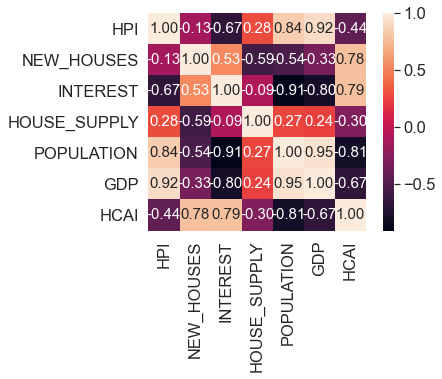

In [10]:
cm = np.corrcoef(df.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=df.columns,
                xticklabels=df.columns)

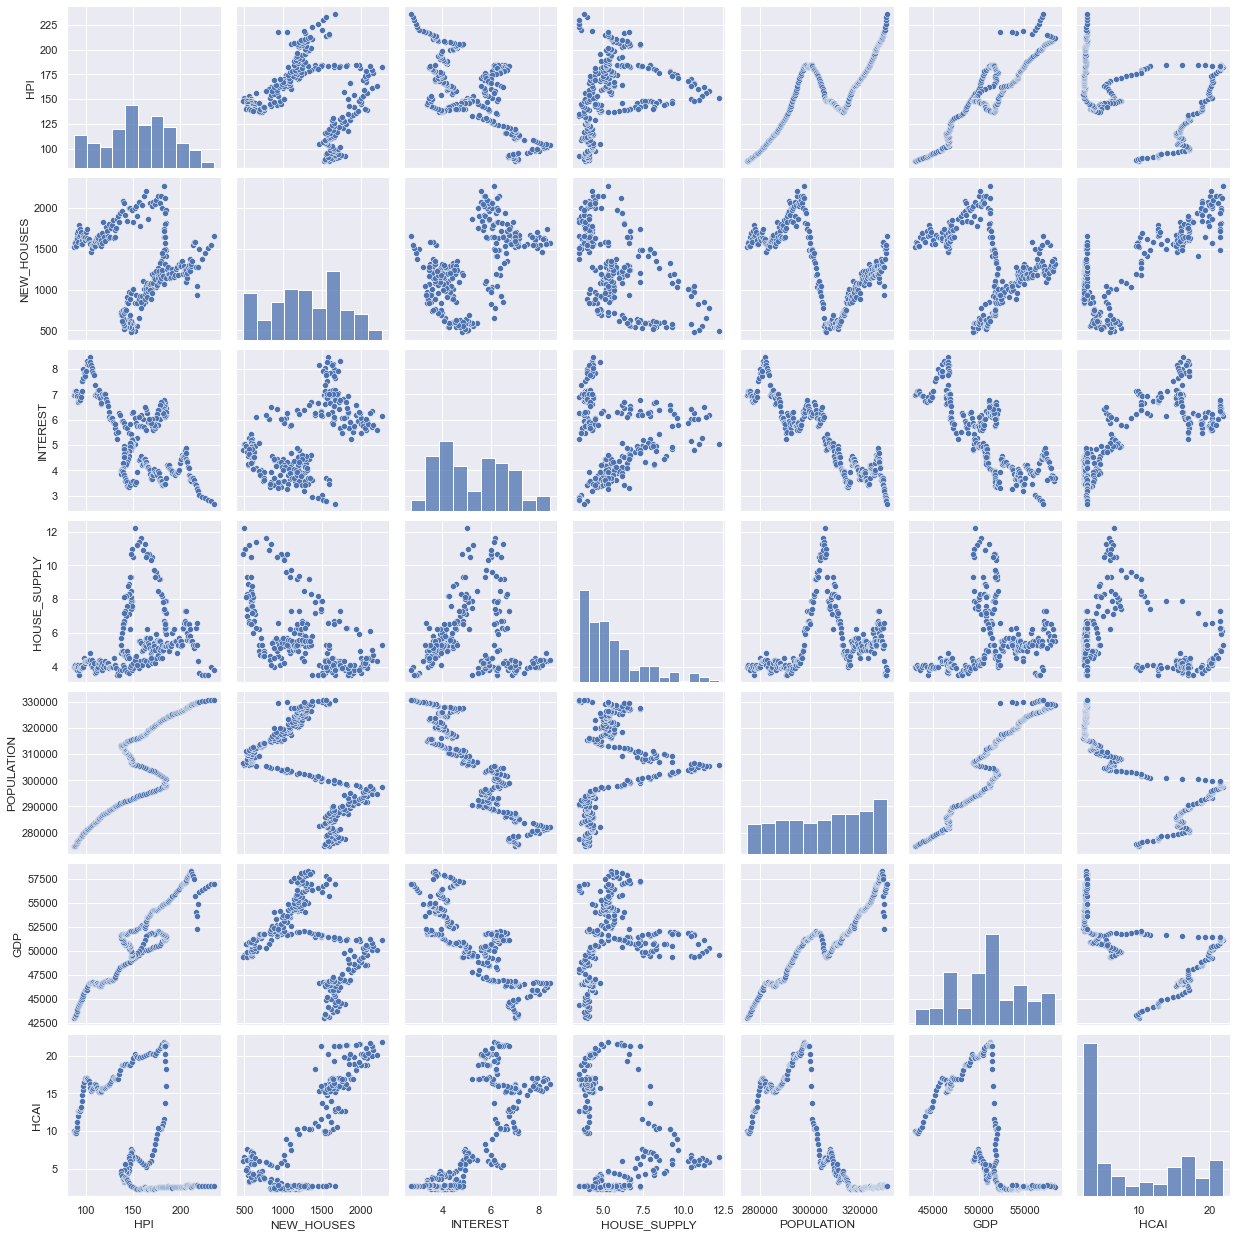

In [12]:
#plot all values in a single plot
sns.set()
cols = ['HPI','NEW_HOUSES','INTEREST','HOUSE_SUPPLY','POPULATION','GDP','HCAI']
sns.pairplot(df[cols],height=2.5)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

#split data into training and testing sets
x=df.drop('HPI',axis=1)
y=df['HPI']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=42)


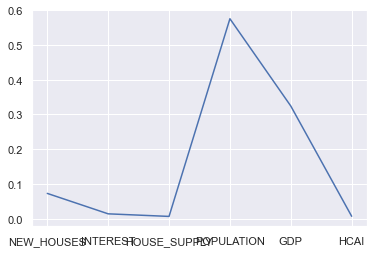

[0.07274082 0.01392184 0.00647934 0.57562882 0.32431391 0.00691526]
Index(['NEW_HOUSES', 'INTEREST', 'HOUSE_SUPPLY', 'POPULATION', 'GDP', 'HCAI'], dtype='object')


In [14]:
#using random forest regression
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000,max_depth=10,min_samples_split=2,min_samples_leaf=1,random_state=42)
rf.fit(xtrain,ytrain)
importances=rf.feature_importances_
plt.plot(df.columns[1:],importances)
plt.show()
print(importances)
print(df.columns[1:])

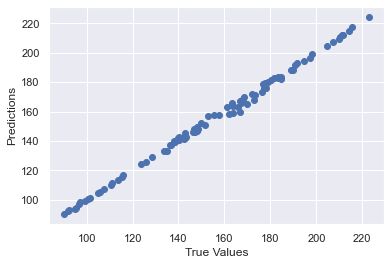

In [17]:
predictions=rf.predict(xtest)
plt.scatter(ytest,predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

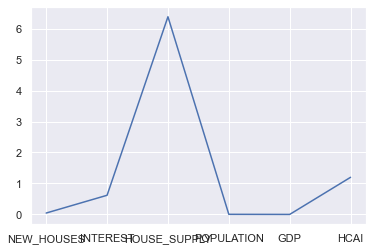

[ 4.41521030e-02  6.17932355e-01  6.38345818e+00  2.76026360e-03
 -3.33018062e-04  1.19835259e+00]
Index(['NEW_HOUSES', 'INTEREST', 'HOUSE_SUPPLY', 'POPULATION', 'GDP', 'HCAI'], dtype='object')


In [67]:
#using linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr_importances=lr.coef_
plt.plot(df.columns[1:],lr_importances)
plt.show()
print(lr_importances)
print(df.columns[1:])

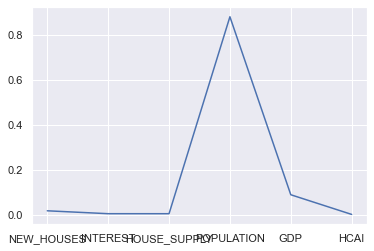

[0.01809983 0.005181   0.00514165 0.8801765  0.08939996 0.00200101]
Index(['NEW_HOUSES', 'INTEREST', 'HOUSE_SUPPLY', 'POPULATION', 'GDP', 'HCAI'], dtype='object')


In [18]:
#using xgboost
from xgboost import XGBRegressor
xgb=XGBRegressor(n_estimators=1000,max_depth=10,random_state=42)
xgb.fit(xtrain,ytrain)
xgb_importances=xgb.feature_importances_
plt.plot(df.columns[1:],xgb_importances)
plt.show()
print(xgb_importances)
print(df.columns[1:])

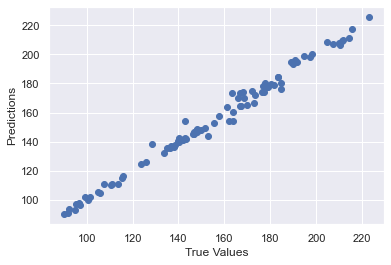

In [19]:
xg_predictions=xgb.predict(xtest)
plt.scatter(ytest,xg_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

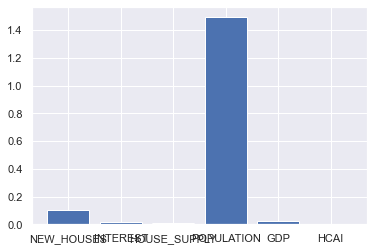

[0.10663522 0.01589062 0.01239151 1.49253174 0.02165455 0.00508527]
Index(['NEW_HOUSES', 'INTEREST', 'HOUSE_SUPPLY', 'POPULATION', 'GDP', 'HCAI'], dtype='object')


In [69]:
#using permutation test to check for significance
from sklearn.inspection import permutation_importance
perm_importances=permutation_importance(xgb,xtrain,ytrain,n_repeats=10,random_state=42)
plt.bar(df.columns[1:],perm_importances.importances_mean)
plt.show()
print(perm_importances.importances_mean)
print(df.columns[1:])

# As we can see, population is the most important factor to predict the HPI.
## GDP is also an important factor.
### Linear Regression shows interest rates and HCAI also make a big impact.
